In [1]:
import scanpy as sc 

/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/env/lib/python3.10/site-package

In [2]:
adata_13= sc.read_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_atlas_anndatas_immune_subsets/progenitor/prog_v2/prog_ft_v4_onlyhsc_mpp.scvi_integrated_fullgenes.h5ad')

In [3]:
adata_17=sc.read_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_atlas_anndatas_immune_subsets/progenitor/prog_v2/prog_pcw17_v4_onlyhsc_mpp.scvi_integrated_fullgenes.h5ad')

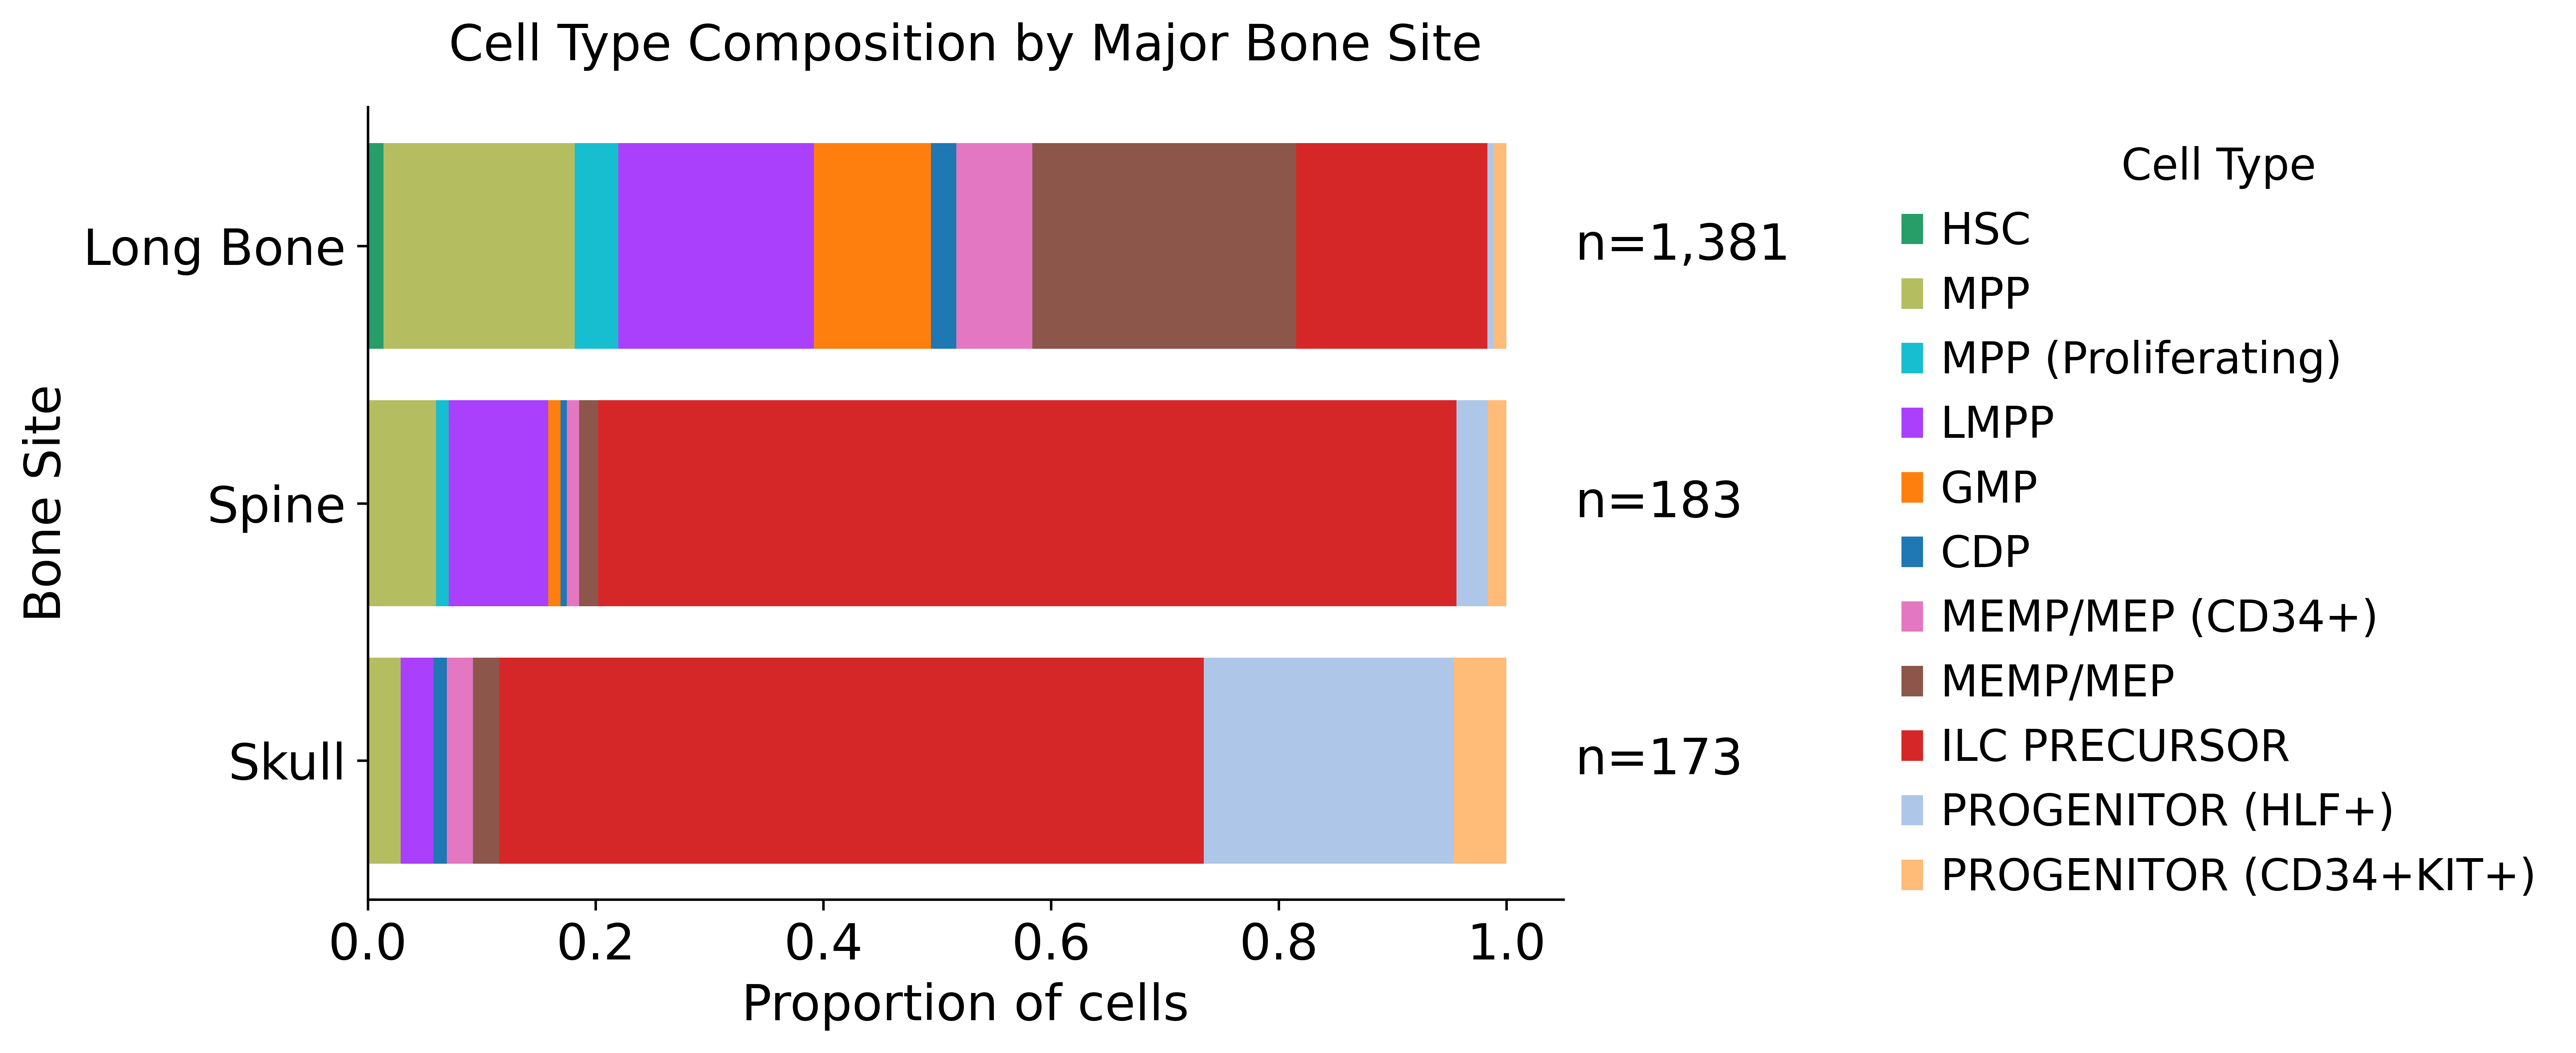

In [5]:

sc.set_figure_params(figsize=(12,7), fontsize=16, dpi=300)


#########################


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

order = [
    "HSC","MPP","MPP (Proliferating)",
     "LMPP",
    "GMP","CDP",
    "MEMP/MEP (CD34+)","MEMP/MEP",
   "ILC PRECURSOR",
    "PROGENITOR (HLF+)","PROGENITOR (CD34+KIT+)"
]

palette = {
    "CDP": "#1f77b4",
    "GMP": "#ff7f0e",
    "HSC": "#279e68",
    "ILC PRECURSOR": "#d62728",
    "LMPP": "#aa40fc",
    "MEMP/MEP": "#8c564b",
    "MEMP/MEP (CD34+)": "#e377c2",
    "MPP": "#b5bd61",
    "MPP (Proliferating)": "#17becf",
    "PROGENITOR (HLF+)": "#aec7e8",
    "PROGENITOR (CD34+KIT+)": "#ffbb78"
}

celltype_col = "Prog_Only_Anno_Level1_V3"
site_col     = "Major_Bone_Sites"

# ─── 1️⃣ Compute cell proportions ──────────────────────────────
counts = pd.crosstab(adata_13.obs[site_col], adata_13.obs[celltype_col])
props  = counts.div(counts.sum(axis=1), axis=0)

# ─── 2️⃣ Ensure all desired cell types exist as columns ─────────
manual_order = [
    "HSC","MPP","MPP (Proliferating)",
    "LMPP","GMP","CDP",
    "MEMP/MEP (CD34+)","MEMP/MEP",
    "ILC PRECURSOR",
    "PROGENITOR (HLF+)", "PROGENITOR (CD34+KIT+)"
]

for ct in manual_order:
    if ct not in props.columns:
        props[ct] = 0.0
props = props[manual_order]
counts = counts.reindex(columns=manual_order, fill_value=0)

# ─── 3️⃣ Use the same palette you defined earlier ───────────────
colors_ordered = [palette[ct] for ct in manual_order]

# ─── 4️⃣ Order sites by dominance (optional aesthetic) ─────────
dominant_fraction = props.max(axis=1)
site_order = [ "Skull", "Spine","Long Bone"]
site_order = [s for s in site_order if s in props.index]
#site_order = dominant_fraction.sort_values(ascending=False).index

# ─── 5️⃣ Plot stacked horizontal bars ───────────────────────────
fig, ax = plt.subplots(figsize=(13, 5))
bottom = np.zeros(len(site_order))

for ct, color in zip(manual_order, colors_ordered):
    vals = props.loc[site_order, ct].values
    ax.barh(site_order, vals, left=bottom, color=color, edgecolor="none", label=ct)
    bottom += vals

# ─── 6️⃣ Add total cell count labels ────────────────────────────
totals = counts.sum(axis=1)
for i, site in enumerate(site_order):
    ax.text(1.01, i, f"n={totals.loc[site]:,}",
            va="center", transform=ax.get_yaxis_transform())

# ─── 7️⃣ Style adjustments ─────────────────────────────────────
ax.set_xlim(0, 1.05)
ax.set_xlabel("Proportion of cells", fontsize=16)
ax.set_ylabel("Bone Site", fontsize=16)
ax.set_title("Cell Type Composition by Major Bone Site", fontsize=16, pad=15)
ax.legend(
    title="Cell Type",
    bbox_to_anchor=(1.25, 1),
    loc="upper left",
    frameon=False,
    fontsize=14,
    title_fontsize=14
)
ax.grid(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

plt.tight_layout()
plt.savefig("barplot_bone_sites_composition_ft.pdf", dpi=300, bbox_inches="tight")
plt.show()


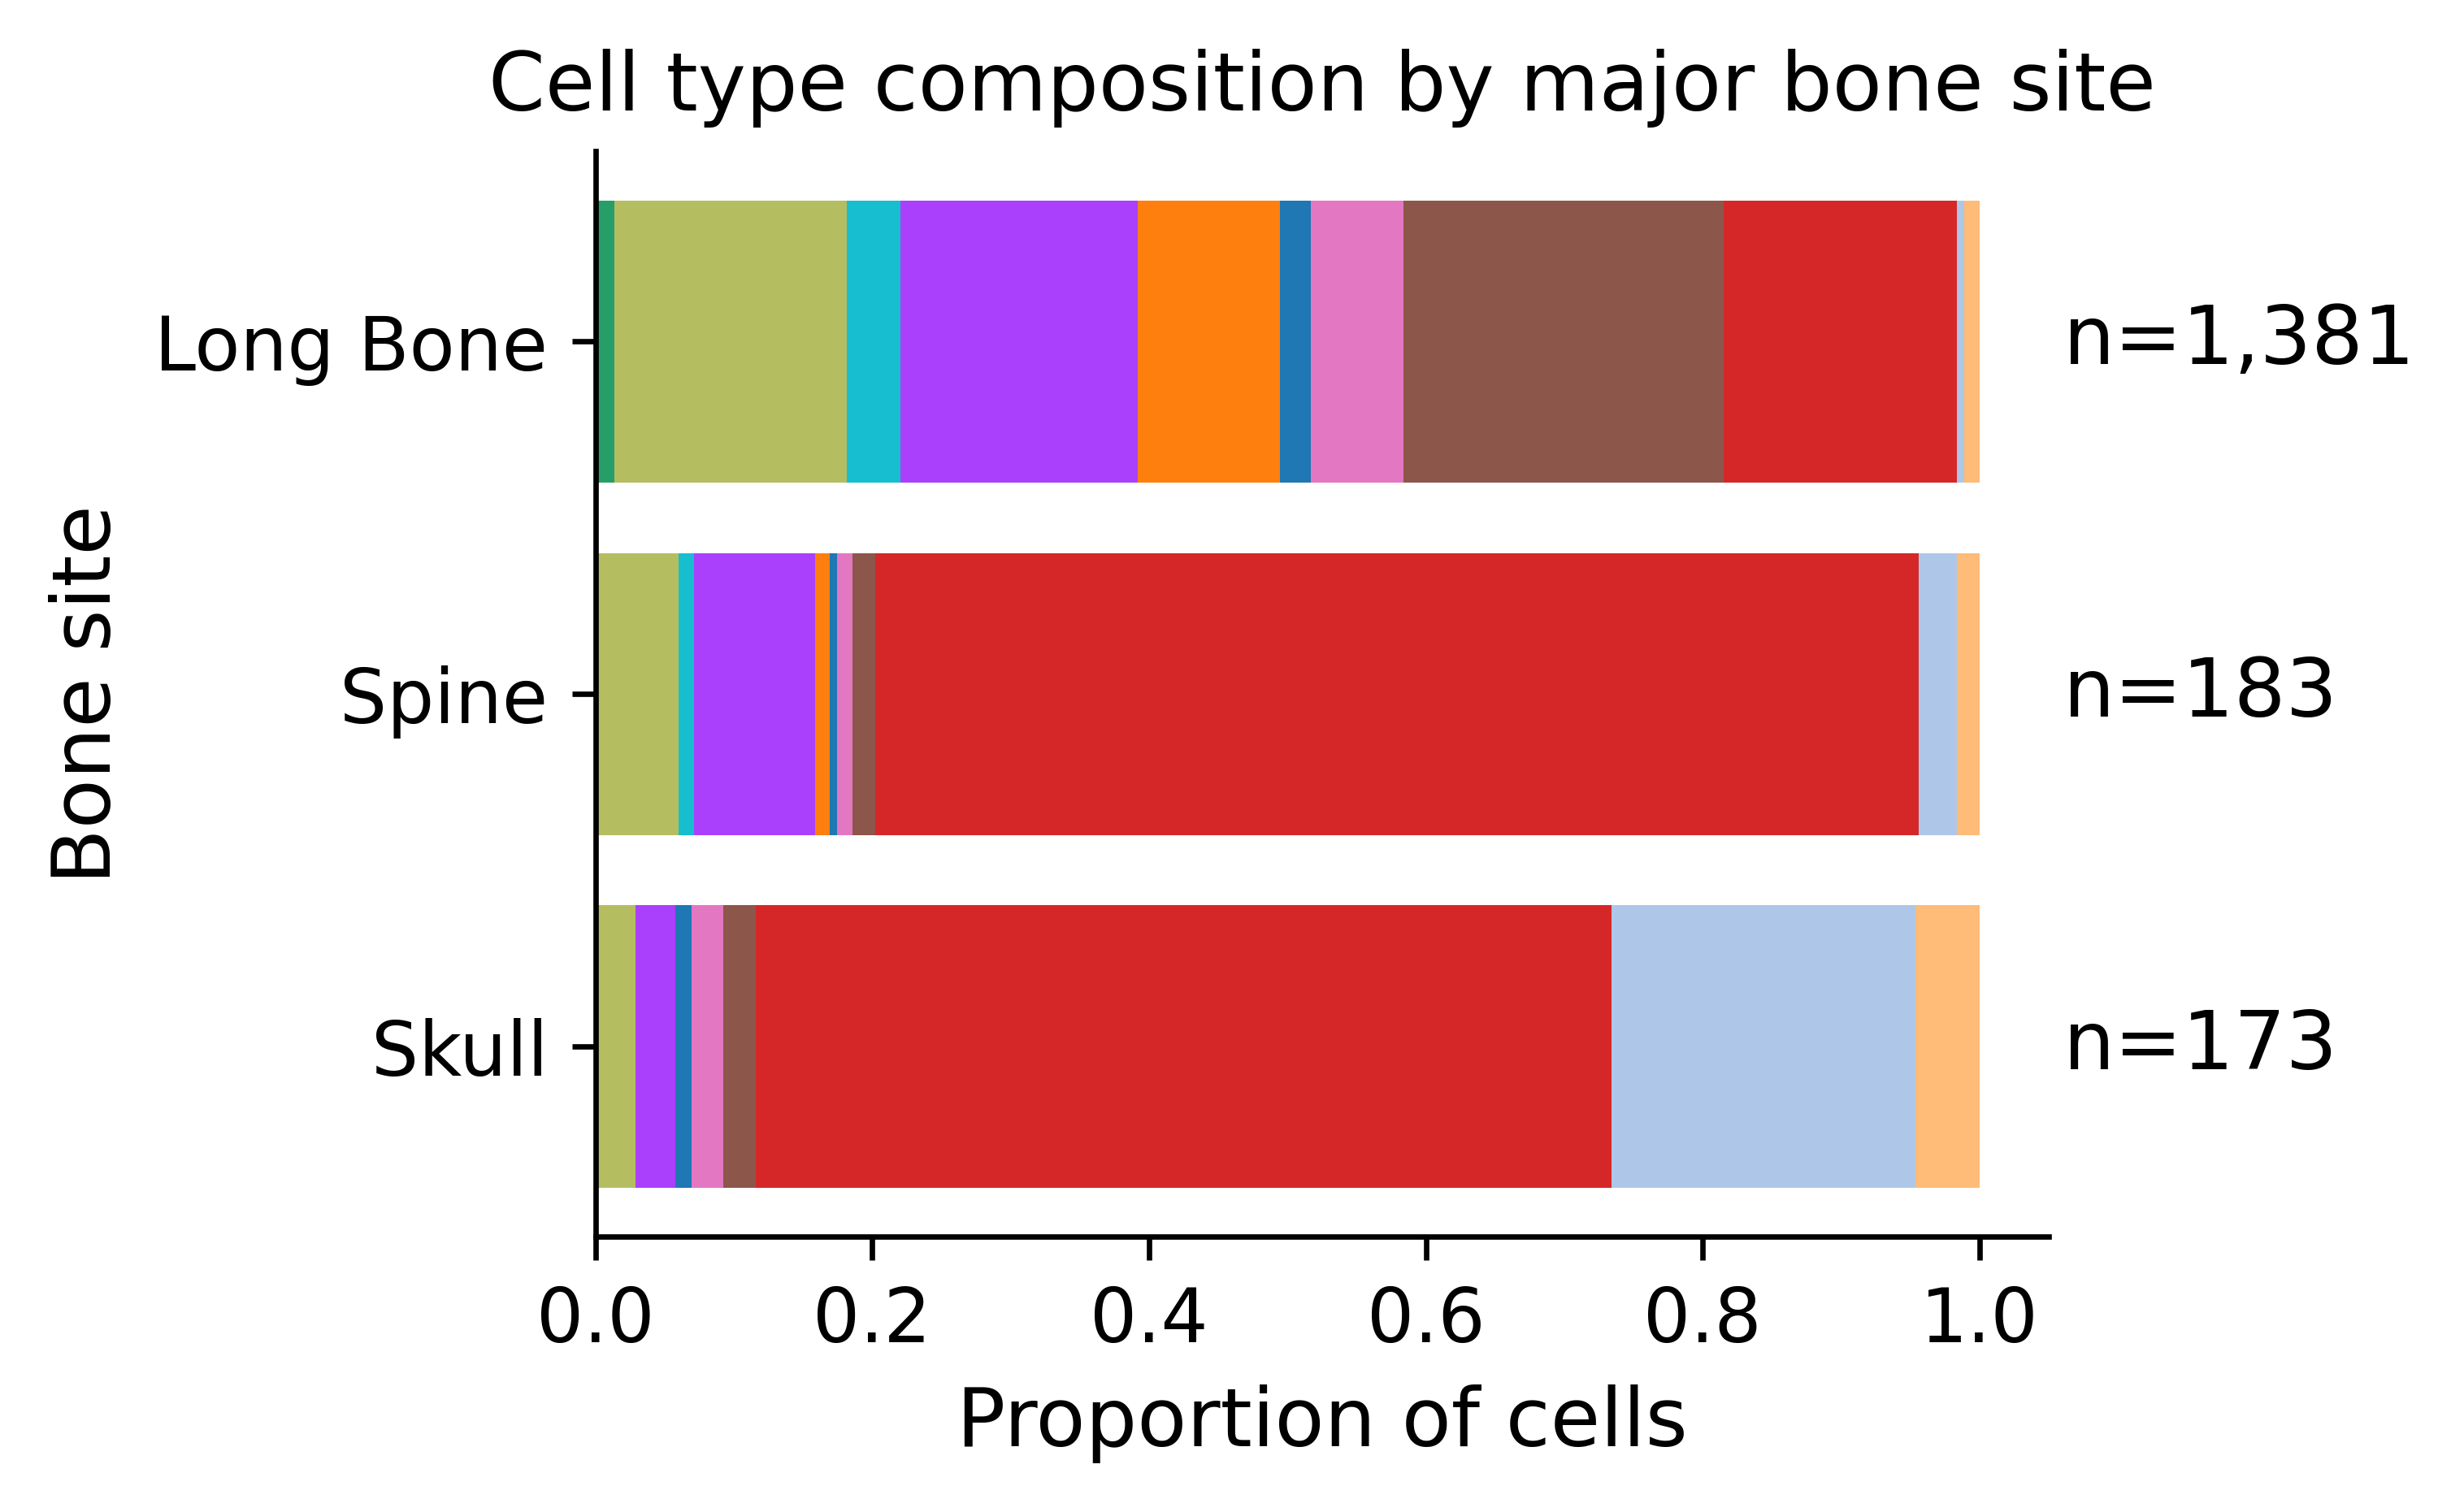

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

# -------------------------------------------------
# Print-safe settings (A4, 12 pt, Illustrator-safe)
# -------------------------------------------------
plt.rcParams.update({
    "font.size": 12,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial", "DejaVu Sans"],
    "pdf.fonttype": 42,
    "ps.fonttype": 42
})

celltype_col = "Prog_Only_Anno_Level1_V3"
site_col     = "Major_Bone_Sites"

# -------------------------------------------------
# Cell-type order and palette
# -------------------------------------------------
manual_order = [
    "HSC","MPP","MPP (Proliferating)",
    "LMPP","GMP","CDP",
    "MEMP/MEP (CD34+)","MEMP/MEP",
    "ILC PRECURSOR",
    "PROGENITOR (HLF+)","PROGENITOR (CD34+KIT+)"
]

palette = {
    "CDP": "#1f77b4",
    "GMP": "#ff7f0e",
    "HSC": "#279e68",
    "ILC PRECURSOR": "#d62728",
    "LMPP": "#aa40fc",
    "MEMP/MEP": "#8c564b",
    "MEMP/MEP (CD34+)": "#e377c2",
    "MPP": "#b5bd61",
    "MPP (Proliferating)": "#17becf",
    "PROGENITOR (HLF+)": "#aec7e8",
    "PROGENITOR (CD34+KIT+)": "#ffbb78"
}

# -------------------------------------------------
# Compute proportions
# -------------------------------------------------
counts = pd.crosstab(adata_13.obs[site_col], adata_13.obs[celltype_col])
props  = counts.div(counts.sum(axis=1), axis=0)

# Ensure all desired cell types exist
for ct in manual_order:
    if ct not in props.columns:
        props[ct] = 0.0

props  = props[manual_order]
counts = counts.reindex(columns=manual_order, fill_value=0)

# Site order
site_order = ["Skull", "Spine", "Long Bone"]
site_order = [s for s in site_order if s in props.index]

colors_ordered = [palette[ct] for ct in manual_order]

# -------------------------------------------------
# Figure: BARPLOT ONLY
# 60% A4 width × 20% A4 height
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(4.96, 3))  # inches

bottom = np.zeros(len(site_order))

for ct, color in zip(manual_order, colors_ordered):
    vals = props.loc[site_order, ct].values
    ax.barh(
        site_order,
        vals,
        left=bottom,
        color=color,
        edgecolor="none"
    )
    bottom += vals

# -------------------------------------------------
# Formatting
# -------------------------------------------------
ax.set_xlim(0, 1.05)
ax.set_xlabel("Proportion of cells", fontsize=12)
ax.set_ylabel("Bone site", fontsize=12)
ax.set_title(
    "Cell type composition by major bone site",
    fontsize=12,
    pad=6
)

ax.tick_params(axis="both", labelsize=11)
ax.grid(False)

# Total cell counts
totals = counts.sum(axis=1)
for i, site in enumerate(site_order):
    ax.text(
        1.01, i,
        f"n={totals.loc[site]:,}",
        va="center",
        fontsize=12,
        transform=ax.get_yaxis_transform()
    )

for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

plt.tight_layout(pad=0.3)

# -------------------------------------------------
# Save
# -------------------------------------------------
fig.savefig(
    "barplot_bone_sites_composition_A4_60w_20h.pdf",
    bbox_inches="tight"
)
fig.savefig(
    "barplot_bone_sites_composition_A4_60w_20h.png",
    dpi=600,
    bbox_inches="tight"
)

plt.show()


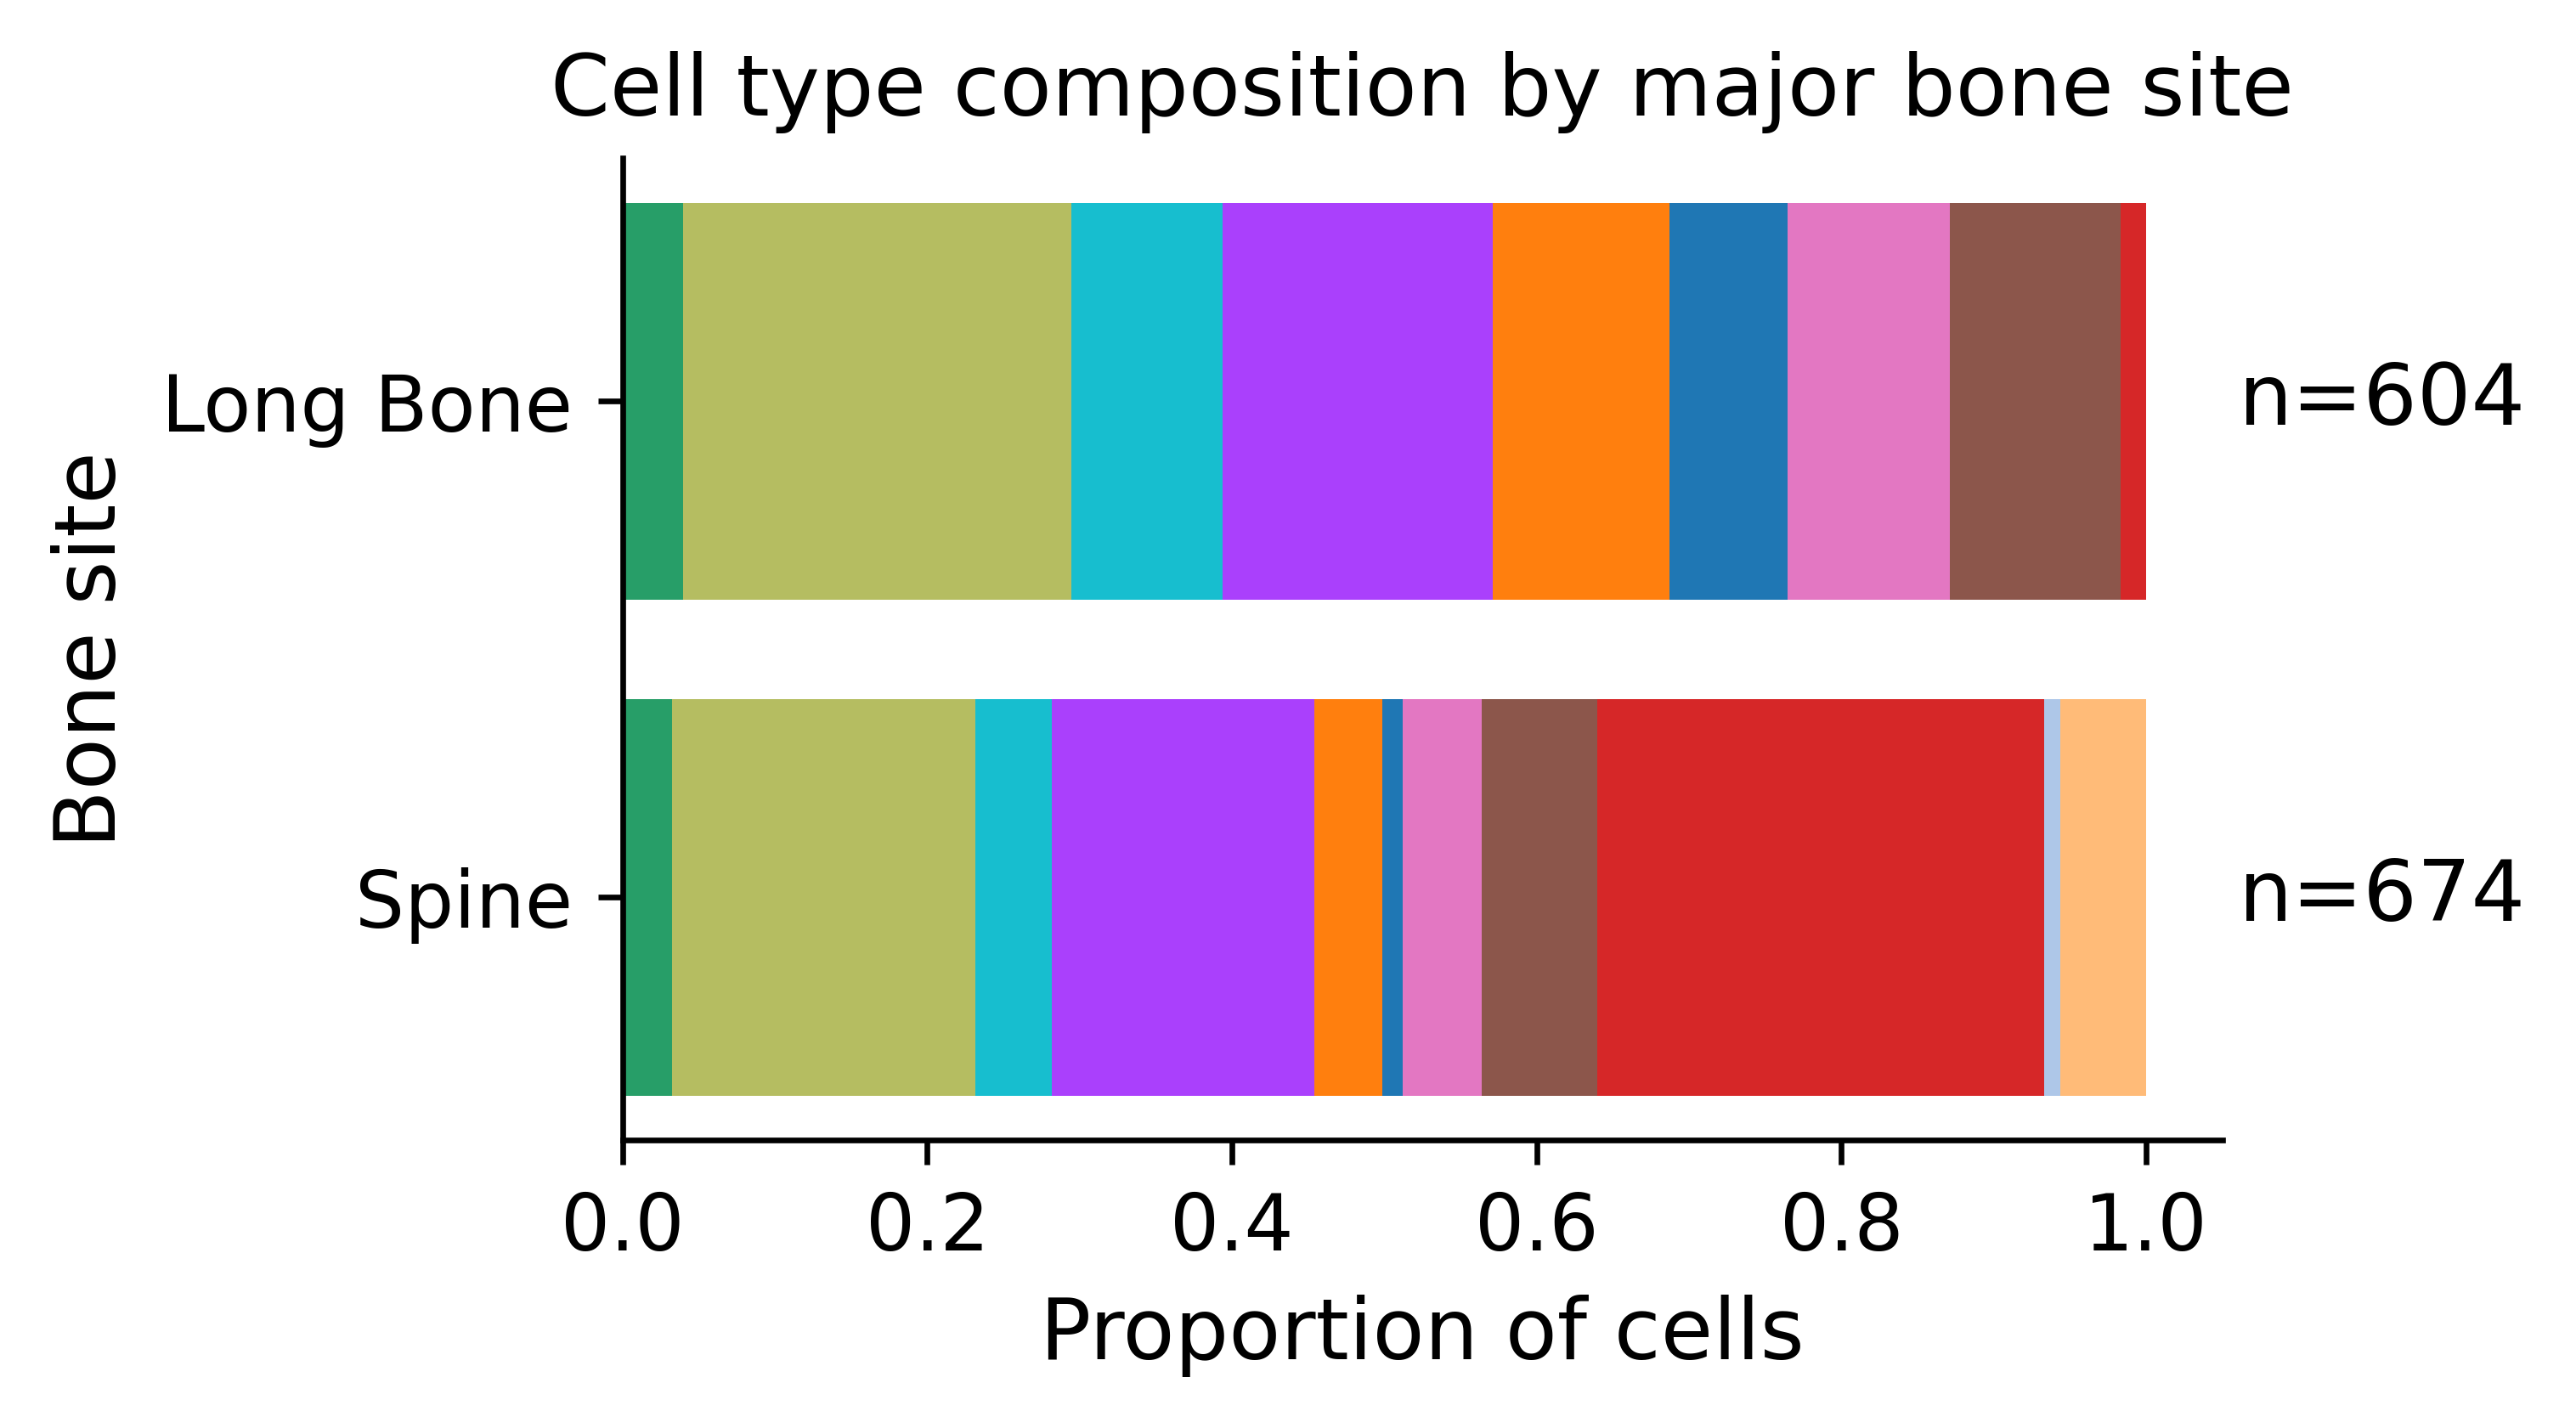

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------
# Print-safe settings (A4, 12 pt, Illustrator-safe)
# -------------------------------------------------
plt.rcParams.update({
    "font.size": 12,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial", "DejaVu Sans"],
    "pdf.fonttype": 42,
    "ps.fonttype": 42
})

celltype_col = "Prog_Only_Anno_Level1_V3"
site_col     = "Major_Bone_Sites"

# -------------------------------------------------
# Compute cell proportions
# -------------------------------------------------
counts = pd.crosstab(adata_17.obs[site_col], adata_17.obs[celltype_col])
props  = counts.div(counts.sum(axis=1), axis=0)

# Desired cell-type order
manual_order = [
    "HSC","MPP","MPP (Proliferating)",
    "LMPP","GMP","CDP",
    "MEMP/MEP (CD34+)","MEMP/MEP",
    "ILC PRECURSOR",
    "PROGENITOR (HLF+)", "PROGENITOR (CD34+KIT+)"
]

# Ensure all desired cell types exist
for ct in manual_order:
    if ct not in props.columns:
        props[ct] = 0.0

props  = props[manual_order]
counts = counts.reindex(columns=manual_order, fill_value=0)

# Colors (same palette as before)
colors_ordered = [palette[ct] for ct in manual_order]

# Order sites by dominance
dominant_fraction = props.max(axis=1)
site_order = dominant_fraction.sort_values(ascending=False).index

# -------------------------------------------------
# Figure: BARPLOT ONLY
# 60% A4 width × 20% A4 height
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(4.96, 2.7))  # inches

bottom = np.zeros(len(site_order))

for ct, color in zip(manual_order, colors_ordered):
    vals = props.loc[site_order, ct].values
    ax.barh(
        site_order,
        vals,
        left=bottom,
        color=color,
        edgecolor="none"
    )
    bottom += vals

# -------------------------------------------------
# Formatting
# -------------------------------------------------
ax.set_xlim(0, 1.05)
ax.set_xlabel("Proportion of cells", fontsize=12)
ax.set_ylabel("Bone site", fontsize=12)
ax.set_title(
    "Cell type composition by major bone site",
    fontsize=12,
    pad=6
)

ax.tick_params(axis="both", labelsize=11)
ax.grid(False)

# Total cell counts
totals = counts.sum(axis=1)
for i, site in enumerate(site_order):
    ax.text(
        1.01, i,
        f"n={totals.loc[site]:,}",
        va="center",
        fontsize=12,
        transform=ax.get_yaxis_transform()
    )

for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

plt.tight_layout(pad=0.3)

# -------------------------------------------------
# Save
# -------------------------------------------------
fig.savefig(
    "barplot_bone_sites_composition_pcw17_A4_60w_20h.pdf",
    bbox_inches="tight"
)
fig.savefig(
    "barplot_bone_sites_composition_pcw17_A4_60w_20h.png",
    dpi=600,
    bbox_inches="tight"
)

plt.show()


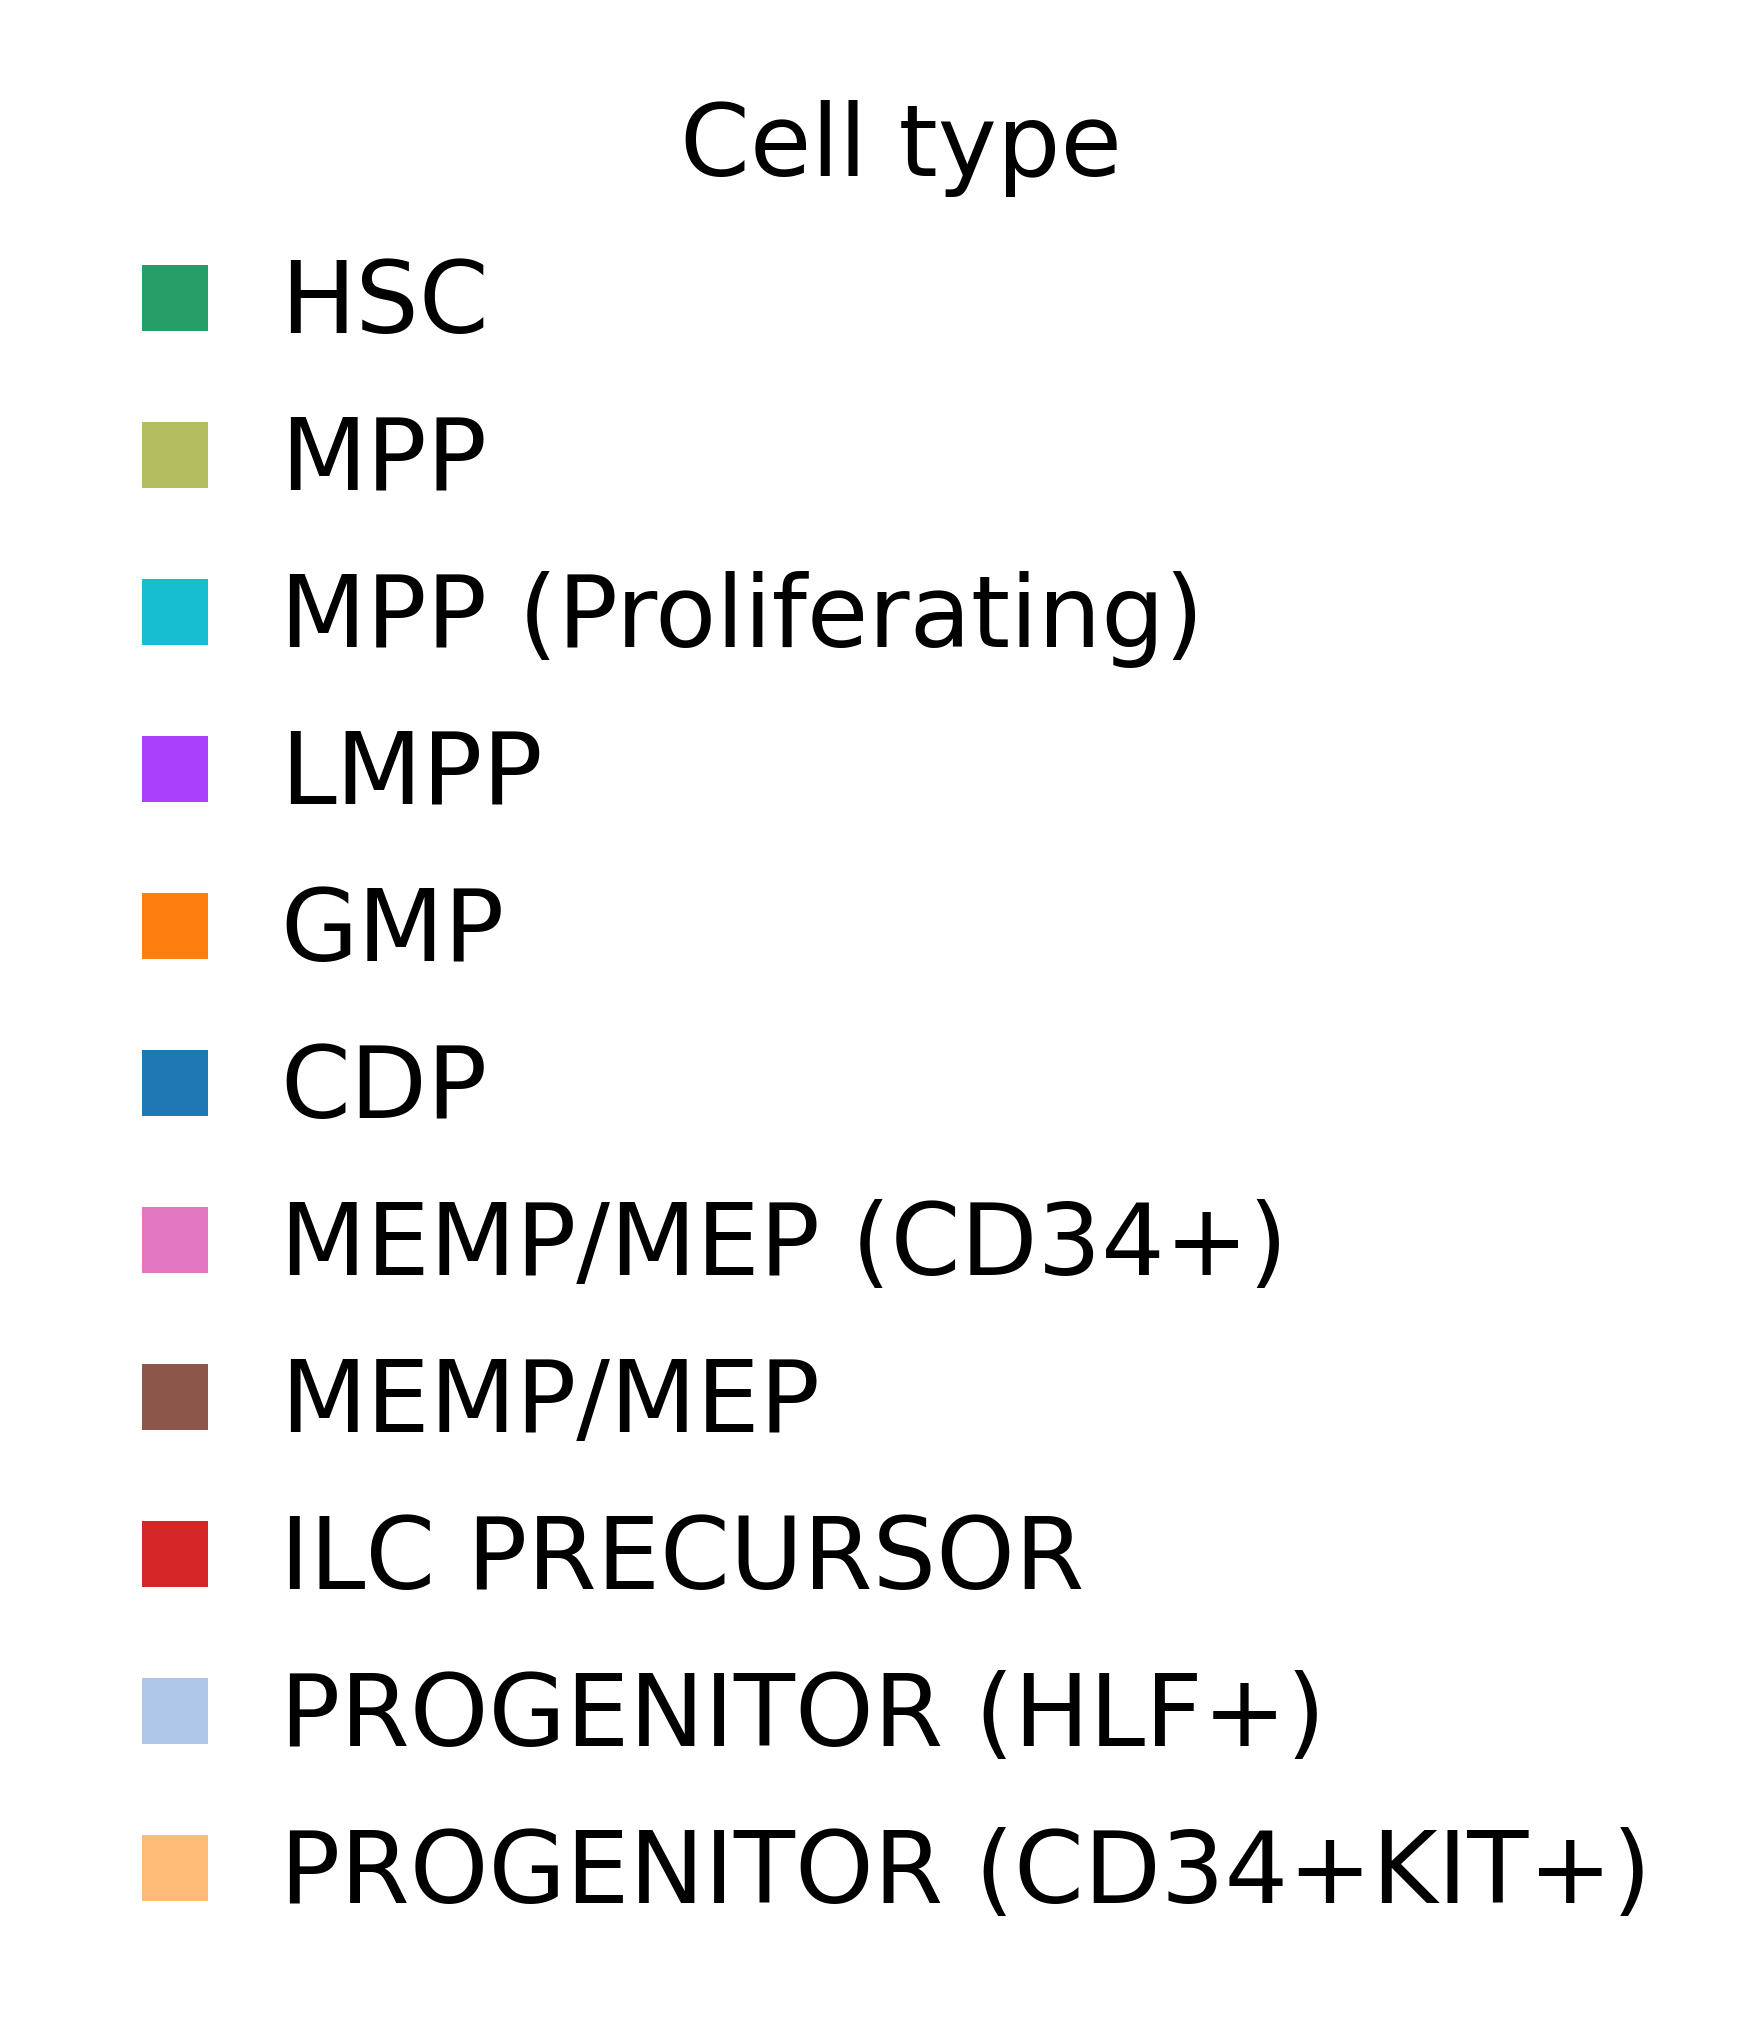

In [10]:
import matplotlib.pyplot as plt

# -------------------------------------------------
# Print-safe settings (match barplots)
# -------------------------------------------------
plt.rcParams.update({
    "font.size": 12,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial", "DejaVu Sans"],
    "pdf.fonttype": 42,
    "ps.fonttype": 42
})

# Cell-type order and palette (EXACTLY as barplot)
manual_order = [
    "HSC","MPP","MPP (Proliferating)",
    "LMPP","GMP","CDP",
    "MEMP/MEP (CD34+)","MEMP/MEP",
    "ILC PRECURSOR",
    "PROGENITOR (HLF+)","PROGENITOR (CD34+KIT+)"
]

palette = {
    "CDP": "#1f77b4",
    "GMP": "#ff7f0e",
    "HSC": "#279e68",
    "ILC PRECURSOR": "#d62728",
    "LMPP": "#aa40fc",
    "MEMP/MEP": "#8c564b",
    "MEMP/MEP (CD34+)": "#e377c2",
    "MPP": "#b5bd61",
    "MPP (Proliferating)": "#17becf",
    "PROGENITOR (HLF+)": "#aec7e8",
    "PROGENITOR (CD34+KIT+)": "#ffbb78"
}

# -------------------------------------------------
# Legend-only figure
# -------------------------------------------------
fig_leg, ax_leg = plt.subplots(figsize=(2.4, 3.0))  # A4-margin friendly
ax_leg.axis("off")

handles = [
    plt.Line2D(
        [0], [0],
        marker="s",
        linestyle="",
        markerfacecolor=palette[ct],
        markeredgecolor="none",
        markersize=8
    )
    for ct in manual_order
]

labels = manual_order

ax_leg.legend(
    handles,
    labels,
    title="Cell type",
    loc="center left",
    frameon=False,
    fontsize=12,
    title_fontsize=12,
    handletextpad=0.8,
    labelspacing=0.6
)

plt.tight_layout(pad=0.2)

# -------------------------------------------------
# Save
# -------------------------------------------------
fig_leg.savefig(
    "Legend_barplot_progenitor_celltypes.pdf",
    bbox_inches="tight"
)
fig_leg.savefig(
    "Legend_barplot_progenitor_celltypes.png",
    dpi=600,
    bbox_inches="tight"
)

plt.show()
